In [1]:
# Import de bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Leitura do arquivo CSV e detalhamento dos 5 primeiros registros
nome_arquivo = './data/comp_bikes_mod.csv'
data_frame = pd.read_csv(nome_arquivo, sep=',')
data_frame.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [3]:
# Informacoes basicas sobre o data set
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


17379

In [4]:
# porcentagem de valores nulos na coluna temp
(len(data_frame.temp[data_frame.temp.isna() == True]) * 100) / len(data_frame.temp)

10.000575407100524

In [5]:
# Descrição dos dados antes de retirar os dados nulos
data_frame.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
data_frame[data_frame.dteday.isna() == True].index

Int64Index([    0,    15,    34,    37,    44,    72,    90,    98,   106,
              107,
            ...
            17305, 17319, 17321, 17327, 17330, 17331, 17353, 17354, 17365,
            17376],
           dtype='int64', length=1738)

In [7]:
# retirar as linhas que contem valores nulos da coluna dteday
data_frame.drop(index=data_frame[data_frame.dteday.isna() == True].index, inplace=True)

In [8]:
# Qual é o valor medio da coluna temp depois da retirada das linhas nulas da coluna dteday
data_frame.temp.mean()

0.49692592065974694

In [9]:
# Qual é o desvio padrao para a coluna windspeed depois do tratamento na coluna dteday
data_frame.windspeed.std()

0.12230930508286576

In [10]:
# transformar a coluna season em valores categoricos; quantas categorias?
tipos_season = set(data_frame.season.unique())
tipos_season

{nan, 1.0, 2.0, 3.0, 4.0}

In [11]:
# Transformar dteday em datetime e ver qual é a ultima data desta coluna
print('menor data {}'.format(data_frame.dteday.min()))
print('maior data {}'.format(data_frame.dteday.max()))

menor data 2011-01-01
maior data 2012-12-31


<AxesSubplot:>

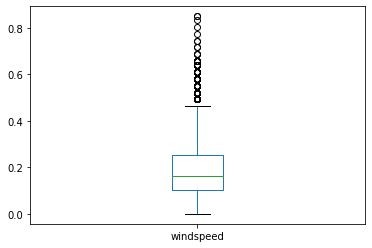

In [12]:
# plotar grafico de caixa para windspeed
data_frame.windspeed.plot(kind='box')

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [14]:
# Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? 
data_frame.hum.fillna(data_frame.hum.mean(), inplace=True)
data_frame.cnt.fillna(data_frame.cnt.mean(), inplace=True)
data_frame.casual.fillna(data_frame.casual.mean(), inplace=True)
#X = pd.DataFrame({'hum': data_frame.iloc[:,12].astype('float64'), 'casual': data_frame.iloc[:,14].astype('float64')}) 
X = data_frame.loc[:, ['hum','casual']]
y = data_frame.iloc[:,16].astype('int')

# vou passar a coluna casual para uma mesma escala (0,1) que a coluna hum
casual_array = np.array(list(X.casual))
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(casual_array.reshape((-1,1)))
X.casual = scaled_array

# treinamento com regressao linear
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)
from sklearn.metrics import r2_score #utilizada para o calculo do R2
#print('Acuracia - {}'.format(modelo.score(X, modelo.predict(X))))
print('R2: {}'.format(r2_score(y, modelo.predict(X))))

R2: 0.40598926701658


In [15]:
# Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default". 
from sklearn.tree import DecisionTreeRegressor
modelo_arvore = DecisionTreeRegressor()
modelo_arvore.fit(X, y)
r2_score(y, modelo_arvore.predict(X))

0.709866658358919

In [16]:
X

,hum,casual
1,0.80,0.021798
2,0.80,0.013624
3,0.75,0.008174
4,0.75,0.000000
5,0.75,0.000000
...,...,...
17373,0.48,0.027248
17374,0.60,0.029973
17375,0.60,0.096502
17377,0.56,0.035422


In [17]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],

     index=['cobra', 'viper', 'sidewinder'],

     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [18]:
df.loc[:, 'shield'] #loc para uma coluna completa é preciso dizer que quer todas as linhas

cobra         2
viper         5
sidewinder    8
Name: shield, dtype: int64

In [19]:
df.loc['cobra'] # mas a linha não precisa dizer qual é as colunas pois retorna todas

max_speed    1
shield       2
Name: cobra, dtype: int64